# SVD: Singular Value Decomposition

## Importing all the libraries required

In [18]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from PIL import Image

High dimensionality is a common challenge in processing data from complex systems. These systems may involve large measured data sets including audio, image, or video data. The data may also be generated from a physical system, such as neural recordings from a brain, or fluid velocity measurements from a simulation or experiment.

**The SVD provides a systematic way to determine a low-dimensional approximation to high-dimensional data in terms of dominant patterns.**

## Computing SVD

In [10]:
X = np.random.rand(5,3)
U, S, V = np.linalg.svd(X, full_matrices= True)

def print_matrix(name, mat):
    print(f"\n{name} (shape {mat.shape}):\n{mat}")

print_matrix("X", X)
print_matrix("U", U)
print_matrix("S", S)  
print_matrix("V", V)


X (shape (5, 3)):
[[0.01478247 0.83473023 0.60679036]
 [0.5506537  0.91085193 0.00394492]
 [0.71530481 0.44567143 0.84150819]
 [0.38133865 0.65187672 0.3675248 ]
 [0.53157804 0.44742021 0.2810215 ]]

U (shape (5, 5)):
[[-0.44837845  0.06078407  0.84751993 -0.25474491  0.10989567]
 [-0.46154918  0.70013351 -0.3242808  -0.25341218 -0.35694489]
 [-0.53532906 -0.70516873 -0.22956493 -0.15147883 -0.37485193]
 [-0.41457939  0.08974316  0.04177061  0.90403524  0.03233558]
 [-0.35703759 -0.02831261 -0.34943825 -0.17510492  0.84791139]]

S (shape (3,)):
[2.01967105 0.68244883 0.58211377]

V (shape (3, 3)):
[[-0.490968   -0.72450381 -0.48378162]
 [-0.14478559  0.615455   -0.77475949]
 [-0.85906202  0.31033751  0.40706642]]


## Computing Economy SVD

Economy SVD (also called reduced SVD) computes only the leading singular vectors and values needed to reconstruct the original matrix, avoiding unnecessary zero-padding

In [11]:
Uh, Sh, Vh = np.linalg.svd(X, full_matrices=False)

print_matrix("X", X)
print_matrix("Uh", Uh)
print_matrix("Sh", Sh)  
print_matrix("Vh", Vh)


X (shape (5, 3)):
[[0.01478247 0.83473023 0.60679036]
 [0.5506537  0.91085193 0.00394492]
 [0.71530481 0.44567143 0.84150819]
 [0.38133865 0.65187672 0.3675248 ]
 [0.53157804 0.44742021 0.2810215 ]]

Uh (shape (5, 3)):
[[-0.44837845  0.06078407  0.84751993]
 [-0.46154918  0.70013351 -0.3242808 ]
 [-0.53532906 -0.70516873 -0.22956493]
 [-0.41457939  0.08974316  0.04177061]
 [-0.35703759 -0.02831261 -0.34943825]]

Sh (shape (3,)):
[2.01967105 0.68244883 0.58211377]

Vh (shape (3, 3)):
[[-0.490968   -0.72450381 -0.48378162]
 [-0.14478559  0.615455   -0.77475949]
 [-0.85906202  0.31033751  0.40706642]]


## Image Compression using SVD

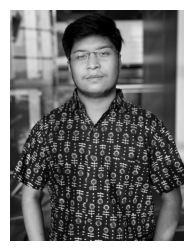

In [31]:
me = imread('me.jpg') #loading the image
me_gray = Image.open('me.jpg').convert('L') #convertin to gray scale

#plotting the image
plt.figure(figsize=(4, 3))  
img = plt.imshow(me_gray)
img.set_cmap('gray')
plt.axis('off')
plt.show()

This code reconstructs a matrix X using truncated SVD for different ranks r = 5, 20, 100, showing how much information each rank captures. The matrices U, S, and VT are used to approximate the original data, and each approximation is visualized in grayscale.

Just a rank 100 matrix can help us almost reconstruct the image. 

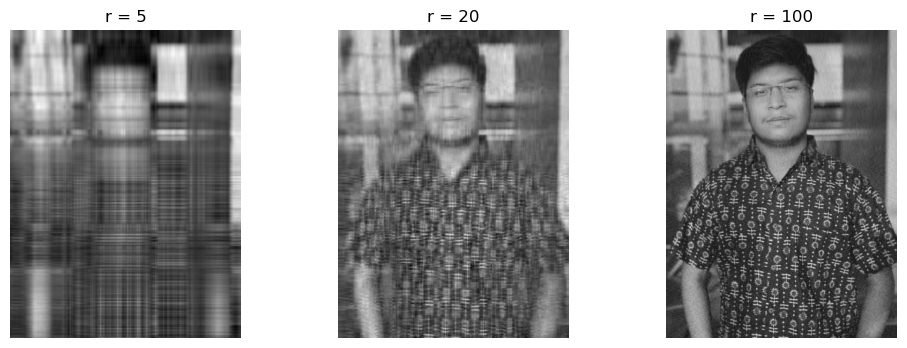

In [37]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

for j, r in enumerate((5, 20, 100)):
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]

    axes[j].imshow(Xapprox, cmap='gray')
    axes[j].axis('off')
    axes[j].set_title(f"r = {r}")

plt.show()

This code plots a semilog graph of the singular values (showing their exponential decay) and the cumulative energy captured by them. The red dot highlights how much energy is preserved using the first r = 100 singular values.

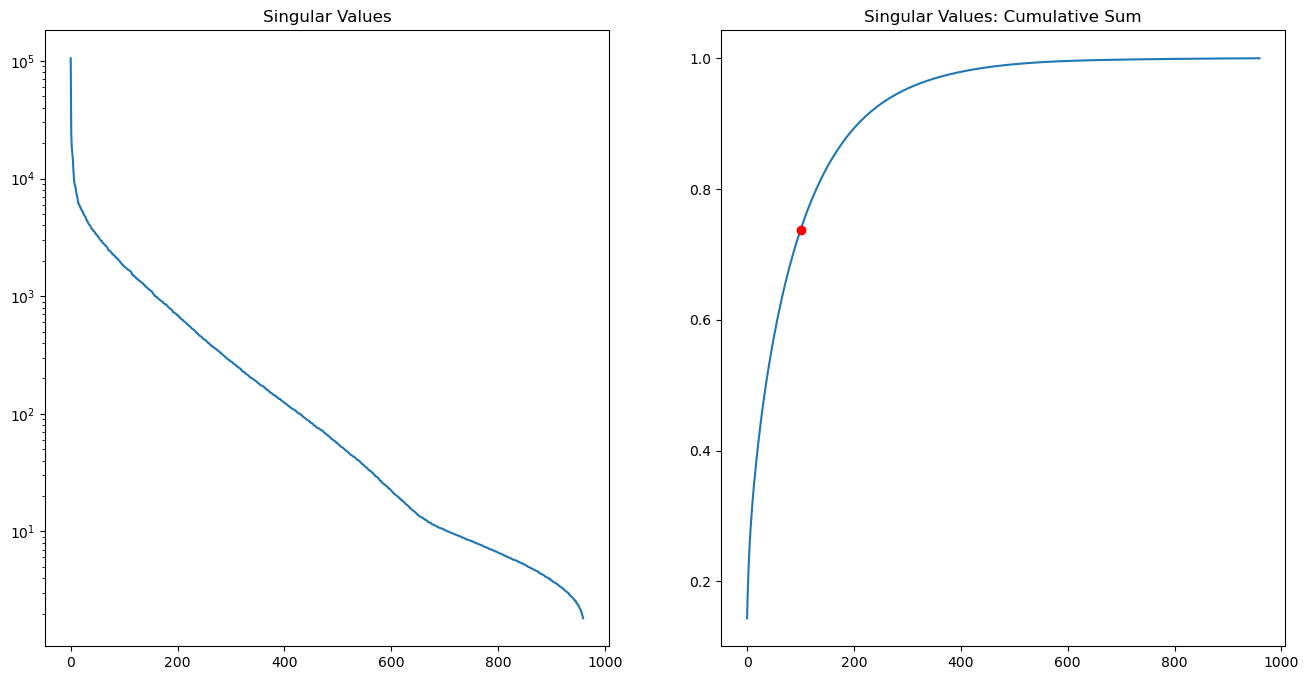

In [40]:
fig1, axes1= plt.subplots(1,2)

# Plot 1: Semilog plot of singular values
axes1[0].semilogy(np.diag(S))
axes1[0].set_title('Singular Values')

# Plot 2: Cumulative sum of singular values
cumsum = np.cumsum(np.diag(S)) / np.sum(np.diag(S))
axes1[1].plot(cumsum)
axes1[1].set_title('Singular Values: Cumulative Sum')

r = 100
axes1[1].plot(r, cumsum[r], 'ro')              

plt.show()